# ***IMPORTING LIBRARIES***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***Get the Dataset***

In [6]:
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = pd.DataFrame(housing.frame)
demo_df = df
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# ***EDA ON DATASET***

In [9]:
demo_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [10]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
demo_df.describe() # WE NEED SCALING

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


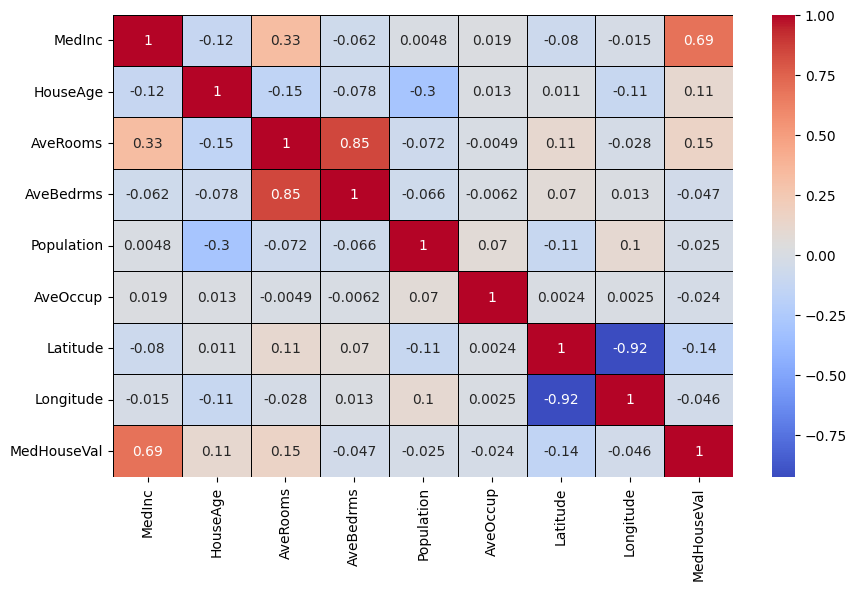

In [16]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",linewidths=0.5,linecolor="black")
plt.show()

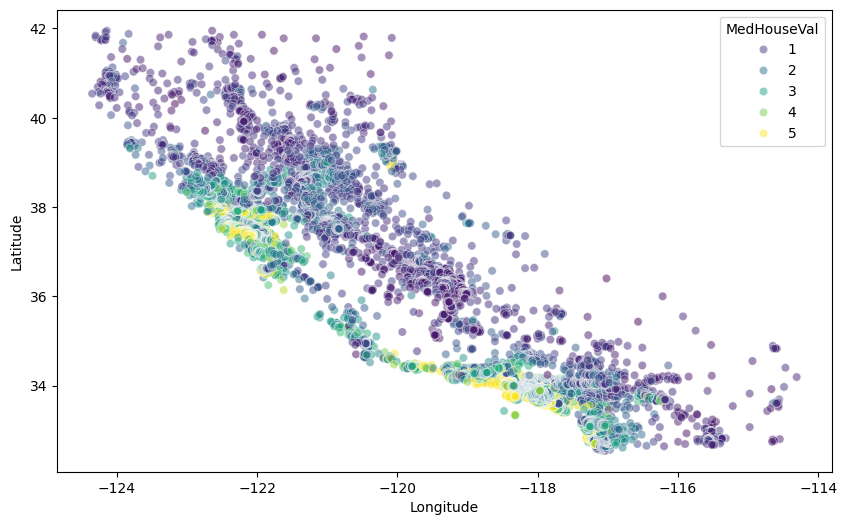

In [17]:
# Price vs Latitude/Longitude
plt.figure(figsize=(10,6))
sns.scatterplot(data=demo_df, x="Longitude", y="Latitude", hue="MedHouseVal", palette="viridis", alpha=0.5)
plt.show()

# ***DATA PREPROCESSING***

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***CHECKING BEST MODEL TO BE***

In [74]:
!pip install lazypredict

In [26]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True)
models,predictions = clf.fit(X_train,X_test,y_train,y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.84       0.84  0.46        0.44
HistGradientBoostingRegressor                0.84       0.84  0.46        0.90
XGBRegressor                                 0.83       0.83  0.47        0.62
ExtraTreesRegressor                          0.81       0.81  0.50        7.63
RandomForestRegressor                        0.80       0.81  0.51       26.92
BaggingRegressor                             0.78       0.78  0.53        4.95
MLPRegressor               

## ***TRAINING MODEL***

In [56]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 20.8 MB/s eta 0:00:00


# ***MODEL 1***

In [80]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold

# MODEL NO 1 --> Mean R2: 0.611936021767489 Std: 0.00726304480387652
model_1 = LGBMRegressor(n_estimators=100, learning_rate=0.01, random_state=42)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_1, X, y, cv=kf, scoring='r2',verbose=0)
print("Mean R2:", scores.mean(), "Std:", scores.std())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start traini

In [81]:
# IMPROVE VERSION

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold

params = {
    'num_leaves': 2790,
    'max_depth': 15,
    'learning_rate': 0.04134647593299318,
    'n_estimators': 1840,
    'min_data_in_leaf': 19,
    'feature_fraction': 0.7689008831917789,
    'bagging_fraction': 0.9632405511906635,
    'lambda_l1': 4.3814513363782694,
    'lambda_l2': 1.997171021640737
}

# MODEL NO 1 --> Mean R2: 0.8588071911618131 Std: 0.006513899183962883
model_lgb = LGBMRegressor(**params, random_state=42)
model_lgb.fit(X_train, y_train)
y_pred = model_lgb.predict(X_test)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_lgb, X, y, cv=kf, scoring='r2',verbose=0)
print("Mean R2:", scores.mean(), "Std:", scores.std())

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [58]:
import optuna

def objective(trial):
    param = {
        "objective": "regression",
        "metric": "r2",
        "boosting_type": "gbdt",
        "verbosity": -1,
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 3000),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 200),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 10.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 10.0),
    }
    model = LGBMRegressor(**param)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)

    return np.mean(scores)

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best hyperparameters
print("Best Trial:")
print(study.best_trial.params)
print("Best R2 Score:", study.best_trial.value)

[I 2025-08-28 10:45:51,087] A new study created in memory with name: no-name-c9d00732-f729-4f68-bada-2851ac65f1c0
[I 2025-08-28 10:46:00,773] Trial 0 finished with value: 0.1709278093208937 and parameters: {'num_leaves': 320, 'max_depth': 12, 'learning_rate': 0.00147595191526742, 'n_estimators': 101, 'min_data_in_leaf': 182, 'feature_fraction': 0.8615720297601803, 'bagging_fraction': 0.8752909757268023, 'lambda_l1': 0.3801431092024199, 'lambda_l2': 0.7172243437179371}. Best is trial 0 with value: 0.1709278093208937.
[I 2025-08-28 10:46:10,785] Trial 1 finished with value: 0.841155888834375 and parameters: {'num_leaves': 441, 'max_depth': 5, 'learning_rate': 0.029348862529531117, 'n_estimators': 880, 'min_data_in_leaf': 95, 'feature_fraction': 0.8190371095121636, 'bagging_fraction': 0.8378542968989826, 'lambda_l1': 0.6074604783167981, 'lambda_l2': 5.494242642654941}. Best is trial 1 with value: 0.841155888834375.
[I 2025-08-28 10:46:44,177] Trial 2 finished with value: 0.762409125578738

Best Trial:
{'num_leaves': 2790, 'max_depth': 15, 'learning_rate': 0.04134647593299318, 'n_estimators': 1840, 'min_data_in_leaf': 19, 'feature_fraction': 0.7689008831917789, 'bagging_fraction': 0.9632405511906635, 'lambda_l1': 4.3814513363782694, 'lambda_l2': 1.997171021640737}
Best R2 Score: 0.8595371256584897


# ***MODEL 2***

In [64]:
from sklearn.ensemble import HistGradientBoostingRegressor

# MODEL NO 2 --> Mean R2: 0.8361070213231983 Std: 0.00794464669893534
model_2 = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_2, X, y, cv=kf, scoring='r2',verbose=0)
print("Mean R2:", scores.mean(), "Std:", scores.std())

Mean R2: 0.8361070213231983 Std: 0.00794464669893534


In [68]:
# IMPROVE VERSION

params = {
 'learning_rate': 0.06553082298395897,
 'max_depth': 12,
 'max_iter': 1160,
 'min_samples_leaf': 90,
 'max_bins': 228,
 'l2_regularization': 9.963895529988566
}


# MODEL NO 2 --> Mean R2: 0.8468154176636183 Std: 0.007875008689564368
model_hgbr = HistGradientBoostingRegressor(**params, random_state=42)
model_hgbr.fit(X_train, y_train)
y_pred = model_hgbr.predict(X_test)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_hgbr, X, y, cv=kf, scoring='r2',verbose=0)
print("Mean R2:", scores.mean(), "Std:", scores.std())

Mean R2: 0.8468154176636183 Std: 0.007875008689564368


In [66]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa


def objective(trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "max_iter": trial.suggest_int("max_iter", 100, 3000),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 10, 200),
        "max_bins": trial.suggest_int("max_bins", 50, 255),
        "l2_regularization": trial.suggest_float("l2_regularization", 0.0, 10.0),
    }

    model = HistGradientBoostingRegressor(
        random_state=42,
        **param
    )

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)

    return np.mean(scores)

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Trial:")
print(study.best_trial.params)
print("Best R2 Score:", study.best_trial.value)


[I 2025-08-28 11:33:09,828] A new study created in memory with name: no-name-80428c60-8a25-4122-8c7c-7974c4cc056c
[I 2025-08-28 11:33:36,343] Trial 0 finished with value: 0.7668184175570476 and parameters: {'learning_rate': 0.0027879412023445755, 'max_depth': 3, 'max_iter': 2444, 'min_samples_leaf': 49, 'max_bins': 78, 'l2_regularization': 1.105091678794169}. Best is trial 0 with value: 0.7668184175570476.
[I 2025-08-28 11:34:40,262] Trial 1 finished with value: 0.794106986995494 and parameters: {'learning_rate': 0.0013378419880138476, 'max_depth': 12, 'max_iter': 2378, 'min_samples_leaf': 96, 'max_bins': 170, 'l2_regularization': 3.1729747042603664}. Best is trial 1 with value: 0.794106986995494.
[I 2025-08-28 11:34:45,627] Trial 2 finished with value: 0.8370315430246358 and parameters: {'learning_rate': 0.14129675134159292, 'max_depth': 15, 'max_iter': 2742, 'min_samples_leaf': 17, 'max_bins': 52, 'l2_regularization': 7.287522633444797}. Best is trial 2 with value: 0.8370315430246358

Best Trial:
{'learning_rate': 0.06553082298395897, 'max_depth': 12, 'max_iter': 1160, 'min_samples_leaf': 90, 'max_bins': 228, 'l2_regularization': 9.963895529988566}
Best R2 Score: 0.8468154176636183


# ***MODEL NO 3***

In [69]:
from xgboost import XGBRegressor


# MODEL NO 3 --> Mean R2: 0.8323809735739877 Std: 0.008825664795818419
model_3 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_3, X, y, cv=kf, scoring='r2',verbose=0)
print("Mean R2:", scores.mean(), "Std:", scores.std())

Mean R2: 0.8323809735739877 Std: 0.008825664795818419


In [71]:
# IMPROVE VERSION

params = {'n_estimators': 2380,
          'max_depth': 14,
          'learning_rate': 0.024879839743713116,
          'subsample': 0.8339628646959569,
          'colsample_bytree': 0.5563815314615177,
          'gamma': 0.01651901319424024,
          'reg_alpha': 6.32412247182362,
          'reg_lambda': 6.821421650137928,
          'min_child_weight': 8
}

# MODEL NO 3 --> Mean R2: 0.8572076624008501 Std: 0.006698271164797762
model_xgb = XGBRegressor(**params, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_xgb, X, y, cv=kf, scoring='r2',verbose=0)
print("Mean R2:", scores.mean(), "Std:", scores.std())

Mean R2: 0.8572076624008501 Std: 0.006698271164797762


In [70]:
import optuna
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

def objective(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 3000),  # boosting rounds
        "max_depth": trial.suggest_int("max_depth", 3, 15),           # tree depth
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),  # eta
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),      # row sampling
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),  # feature sampling
        "gamma": trial.suggest_float("gamma", 0.0, 10.0),             # min loss reduction
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),     # L1 regularization
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),   # L2 regularization
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),  # min sum of instance weight
    }

    model = XGBRegressor(
        random_state=42,
        tree_method="hist",  # faster histogram method (GPU if available)
        n_jobs=-1,
        **param
    )

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)

    return np.mean(scores)

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Trial:")
print(study.best_trial.params)
print("Best R2 Score:", study.best_trial.value)

[I 2025-08-28 11:57:22,648] A new study created in memory with name: no-name-e4f332cc-c4df-43c6-846b-d9a69a8e803b
[I 2025-08-28 11:57:44,586] Trial 0 finished with value: 0.7704147576938544 and parameters: {'n_estimators': 2515, 'max_depth': 3, 'learning_rate': 0.005472839089491569, 'subsample': 0.9552892038152083, 'colsample_bytree': 0.6508965036977734, 'gamma': 9.272931350962883, 'reg_alpha': 5.237656147678456, 'reg_lambda': 8.54422401552624, 'min_child_weight': 14}. Best is trial 0 with value: 0.7704147576938544.
[I 2025-08-28 11:57:58,115] Trial 1 finished with value: 0.7991857258663322 and parameters: {'n_estimators': 2515, 'max_depth': 12, 'learning_rate': 0.0953574679775064, 'subsample': 0.526872051155207, 'colsample_bytree': 0.9170314554341139, 'gamma': 8.355270488017052, 'reg_alpha': 3.902896584334271, 'reg_lambda': 7.891661272308539, 'min_child_weight': 20}. Best is trial 1 with value: 0.7991857258663322.
[I 2025-08-28 11:58:33,215] Trial 2 finished with value: 0.808785054485

Best Trial:
{'n_estimators': 2380, 'max_depth': 14, 'learning_rate': 0.024879839743713116, 'subsample': 0.8339628646959569, 'colsample_bytree': 0.5563815314615177, 'gamma': 0.01651901319424024, 'reg_alpha': 6.32412247182362, 'reg_lambda': 6.821421650137928, 'min_child_weight': 8}
Best R2 Score: 0.8572076624008501


# ***MODEL NO 4***

In [72]:
from sklearn.ensemble import ExtraTreesRegressor

# MODEL NO 4 --> Mean R2: 0.8129821482948131 Std: 0.008107430535175927
model_4 = ExtraTreesRegressor(n_estimators=100, random_state=42)
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_4, X, y, cv=kf, scoring='r2',verbose=0)
print("Mean R2:", scores.mean(), "Std:", scores.std())

Mean R2: 0.8129821482948131 Std: 0.008107430535175927


In [76]:
# IMPROVE VERSION --> bad perform than base model

from sklearn.ensemble import ExtraTreesRegressor

params = {'n_estimators': 808,
          'max_depth': 25,
          'min_samples_split': 9,
          'min_samples_leaf': 1,
          'max_features': 'log2',
          'bootstrap': True
}


# MODEL NO 4 --> Mean R2: 0.8045564140167152 Std: 0.008916593048545736
model_etr = ExtraTreesRegressor(**params, random_state=42)
model_etr.fit(X_train, y_train)
y_pred = model_etr.predict(X_test)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_etr, X, y, cv=kf, scoring='r2',verbose=0)
print("Mean R2:", scores.mean(), "Std:", scores.std())

Mean R2: 0.8045564140167152 Std: 0.008916593048545736


In [73]:
def objective(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),  # number of trees
        "max_depth": trial.suggest_int("max_depth", 5, 50),            # tree depth
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    model = ExtraTreesRegressor(
        random_state=42,
        n_jobs=-1,
        **param
    )

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)

    return np.mean(scores)

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Trial:")
print(study.best_trial.params)
print("Best R2 Score:", study.best_trial.value)

[I 2025-08-28 12:18:50,204] A new study created in memory with name: no-name-aa788b4c-d9a0-4f47-9ba8-dd65efebdb07
[I 2025-08-28 12:19:22,541] Trial 0 finished with value: 0.296933419430829 and parameters: {'n_estimators': 1445, 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.296933419430829.
[I 2025-08-28 12:21:09,253] Trial 1 finished with value: 0.7518021846853173 and parameters: {'n_estimators': 1049, 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 17, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.7518021846853173.
[I 2025-08-28 12:22:05,653] Trial 2 finished with value: 0.6327458987790393 and parameters: {'n_estimators': 1754, 'max_depth': 46, 'min_samples_split': 11, 'min_samples_leaf': 14, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.7518021846853173.
[I 2025-08-28 12:22:28,068] Trial 3 finished with value: 0.6670680775212

Best Trial:
{'n_estimators': 808, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
Best R2 Score: 0.8045564140167152


# ***PREDICTION***

In [86]:
# Example: take the first 5 rows of X_test as raw input
raw_input_demo = X_test.head(5)
print("Raw input data:")
print(raw_input_demo)

# Predict using the reusable pipeline
y_pred_demo = model_lgb.predict(raw_input_demo)

print("\nPredicted target values:")
print(y_pred_demo)

Raw input data:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046    1.68     25.00      4.19       1.02     1392.00      3.88     36.06   
3024     2.53     30.00      5.04       1.19     1565.00      2.68     35.14   
15663    3.48     52.00      3.98       1.19     1310.00      1.36     37.80   
20484    5.74     17.00      6.16       1.02     1705.00      3.44     34.28   
9814     3.73     34.00      5.49       1.03     1063.00      2.48     36.62   

       Longitude  
20046    -119.01  
3024     -119.46  
15663    -122.44  
20484    -118.72  
9814     -121.93  
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7689008831917789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7689008831917789
[LightGBM] [Warning] lambda_l2 is set=1.997171021640737, reg_lambda=0.0 will be ignored. Current value: lambda_l2

In [84]:
X_test.iloc[0:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.68,25.00,4.19,1.02,1392.00,3.88,36.06,-119.01
3024,2.53,30.00,5.04,1.19,1565.00,2.68,35.14,-119.46
15663,3.48,52.00,3.98,1.19,1310.00,1.36,37.80,-122.44
20484,5.74,17.00,6.16,1.02,1705.00,3.44,34.28,-118.72
9814,3.73,34.00,5.49,1.03,1063.00,2.48,36.62,-121.93


In [85]:
y_test.iloc[0:5]

,MedHouseVal
20046,0.48
3024,0.46
15663,5.00
20484,2.19
9814,2.78


# ***saving model***

In [88]:
import joblib
# Save
joblib.dump(model_lgb, "lgbm_model.pkl")

['lgbm_model.pkl']

# ***LOAD AND PREDICT***

In [91]:
# Load
loaded_model = joblib.load("lgbm_model.pkl")

X_test.head(5)

# Predict
loaded_model.predict(X_test.head(5))

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7689008831917789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7689008831917789
[LightGBM] [Warning] lambda_l2 is set=1.997171021640737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.997171021640737
[LightGBM] [Warning] lambda_l1 is set=4.3814513363782694, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3814513363782694
[LightGBM] [Warning] bagging_fraction is set=0.9632405511906635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9632405511906635


array([0.53685587, 0.91540907, 5.14463106, 2.59046793, 2.53425375])

# ***FRONTEND***

In [93]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.9 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np

st.title("California House Price Predictor App")

st.write("Set each feature value individually, then click *Predict*")

# Define sliders individually (different ranges, defaults, steps)
f1 = st.slider("MedInc", min_value=-1, max_value=150, value=2, step=1)
f2 = st.slider("House Age", min_value=1, max_value=50, value=5, step=1)
f3 = st.slider("No Of Rooms ", min_value=1, max_value=15, value=20, step=2)
f4 = st.slider("No Of Bedrooms", min_value=-1, max_value=5, value=0, step=5)
f5 = st.slider("neighborhood size", min_value=0, max_value=5000, value=100, step=10)
f6 = st.slider("Family Members", min_value=1, max_value=10, value=0, step=1)  # like binary
f7 = st.slider("Latitudes", min_value=32, max_value=42, value=0.5, step=0.01)
f8 = st.slider("Longitude", min_value=-125, max_value=-114, value=75, step=5)

# Collect values
features = np.array([f1, f2, f3, f4, f5, f6, f7, f8])

# Predict button
if st.button("Predict"):
    # Example: just return sum of all features
    prediction = np.sum(features)
    st.success(f"Prediction result: {prediction}")



# ***FINAL PROJECT***

In [95]:
!pip install streamlit pyngrok -q

In [109]:
# Write your Streamlit app into a file
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import numpy as np
import joblib

# Load model
loaded_model = joblib.load("lgbm_model.pkl")

st.set_page_config(page_title="California House Price Predictor", layout="wide")

st.title("\t\t\t\t🏡 California House Price Predictor App")

# Two-column layout
col1, col2 = st.columns([1, 2])

# --- Left Column: Input sliders ---
with col1:
    st.subheader("🔧 Input Features")
    f1 = st.slider("Median Income (10k$)", 0.5, 15.0, 3.5, step=0.1)
    f2 = st.slider("House Age (years)", 1, 52, 29, step=1)
    f3 = st.slider("No of Rooms", 1.0, 15.0, 5.0, step=1)
    f4 = st.slider("No of Bedrooms", 0.5, 5.0, 1.0, step=1)
    f5 = st.slider("Neighborhood Population", 0, 5000, 1000, step=50)
    f6 = st.slider("Average Occupancy (family size)", 1.0, 10.0, 3.0, step=0.1)
    f7 = st.slider("Latitude", 32.0, 42.0, 35.0, step=0.01)
    f8 = st.slider("Longitude", -125.0, -114.0, -119.0, step=0.01)

    features = np.array([[f1, f2, f3, f4, f5, f6, f7, f8]])

    if st.button("🔮 Predict"):
        prediction = loaded_model.predict(features)[0]
        st.session_state.pred = prediction

# --- Right Column: Prediction Results ---
with col2:
    st.subheader("📊 Prediction Results")

    if "pred" in st.session_state:
        prediction = st.session_state.pred
        st.success(f"🏠 Estimated Median House Value: **${prediction * 100000:,.2f}**")

        # Show house image
        st.image("/content/moiz1.jpg", width=300)

        # Fun animations
        st.balloons()
        st.progress(min(prediction / 5, 1.0))  # 5 is max MedHouseVal in dataset
    else:
        st.info("👉 Adjust the sliders and click **Predict** to see results here!")
""")

# Expose Streamlit app via ngrok
from pyngrok import ngrok
import subprocess

# Set your token
ngrok.set_auth_token("31v6TD51eSw9bKdFPm2XFtlSnjE_2j4oMvVGiSM2KzWw267t7")

# Kill old tunnels
ngrok.kill()

# Start a new tunnel
public_url = ngrok.connect(8501)
print("👉 Open the app here:", public_url)

# Launch Streamlit
process = subprocess.Popen(["streamlit", "run", "app.py"])


👉 Open the app here: NgrokTunnel: "https://2ebc687f749f.ngrok-free.app" -> "http://localhost:8501"


In [111]:
pip install -r requirement.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirement.txt'


In [112]:
X_test.tail(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15362,4.61,16.00,7.00,1.07,1351.00,2.99,33.36,-117.22
16623,2.73,28.00,6.13,1.26,1650.00,2.34,35.36,-120.83
18086,9.23,25.00,7.24,0.95,1585.00,2.79,37.31,-122.05
2144,2.79,36.00,5.29,0.98,1227.00,2.59,36.77,-119.76
3665,3.55,17.00,3.99,1.03,1671.00,3.73,34.22,-118.37


In [113]:
y_test.tail()

,MedHouseVal
15362,2.63
16623,2.67
18086,5.00
2144,0.72
3665,1.51
